# Which Debts Are Worth the Bank's Effort?

### Project Description
After a debt has been legally declared "uncollectable" by a bank, the account is considered to be "charged-off." But that doesn't mean the bank simply walks away from the debt. They still want to collect some of the money they are owed. In this project, you will look at a situation where a bank assigned delinquent customers to different recovery strategies based on the expected amount the bank believed it would recover from the customer. The goal for the data scientist is to determine in this non-random assignment whether the incremental amount the bank earns exceeded the additional cost of assigning customers to a higher recovery strategy.
Threshold assignments like this also one occur in medicine (above a certain temperature you get medicine), education (above a certain test score students get admitted to a special class), other areas of finance (above a certain wealth customers get different levels of service), and public sector (below a certain income someone is eligible for housing benefits). Regression discontinuity is an intuitive and useful analysis method in any situation of a threshold assignment.

In [2]:
# IMPORT LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("bank_data.csv",index_col=0)

In [10]:
data.head()

,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
id,,,,,
2030,194,263.540,Level 0 Recovery,19,Male
1150,486,416.090,Level 0 Recovery,25,Female
380,527,429.350,Level 0 Recovery,27,Male
1838,536,296.990,Level 0 Recovery,25,Male
1995,541,346.385,Level 0 Recovery,34,Male


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 2030 to 522
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   expected_recovery_amount  1882 non-null   int64  
 1   actual_recovery_amount    1882 non-null   float64
 2   recovery_strategy         1882 non-null   object 
 3   age                       1882 non-null   int64  
 4   sex                       1882 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 88.2+ KB


### Statistical test: age vs. expected recovery amount


In [96]:
#SPLITING THE TEST INTO TWO PARTS
threshold=1000
above_threshold=data[(data["expected_recovery_amount"]>=threshold) & (data["expected_recovery_amount"]<=1100)]
below_threshold=data[(data["expected_recovery_amount"]<threshold) & (data["expected_recovery_amount"]>=900)]

#calculating the diiference between the average age of each list
above_threshold_age=round(above_threshold["age"].sum()/len(above_threshold),1)
below_threshold_age=round(below_threshold["age"].sum()/len(below_threshold),1)

from scipy.stats import kruskal
statistic, p_value = kruskal(above_threshold["age"][:-8],below_threshold["age"])


print("The average age of the customers just above the threshold is ",above_threshold_age)
print("The average age of the customers just below the threshold is ",below_threshold_age)
print("THE DIFFERENCE IS ",abs(above_threshold_age-below_threshold_age))
print("p_value of kruskal test =",round(p_value,2))

The average age of the customers just above the threshold is  28.7
The average age of the customers just below the threshold is  27.2
THE DIFFERENCE IS  1.5
p_value of kruskal test = 0.05 =>There is statistically significant evidence of differences between the groups


There is statistically significant evidence of differences between the groups

Age is similar above and below the $1000 Expected Recovery Amount threshold.

### Statistical test: sex vs. expected recovery amount


In [81]:
above_threshold_male=round(above_threshold[above_threshold["sex"]=="Male"].count()[4]/len(above_threshold),1)
below_threshold_male=round(below_threshold[below_threshold["sex"]=="Male"].count()[4]/len(below_threshold),1)
print("The average male of the customers just above the threshold is ",above_threshold_male*100,"%")
print("The average male of the customers just below the threshold is ",below_threshold_male*100,"%")


The average male of the customers just above the threshold is  60.0 %
The average male of the customers just below the threshold is  60.0 %


Sex is similar above and below the $1000 Expected Recovery Amount threshold.

### Exploratory graphical analysis: recovery amount


We are now reasonably confident that customers just above and just below the $1000 threshold are, on average, similar in terms of their average age and the percentage that are male.


It is now time to focus on the key outcome of interest, the actual recovery amount.
A first step in examining the relationship between the actual recovery amount and the expected recovery amount is to develop a scatter plot where we want to focus our attention at the range just below and just above the threshold. Specifically, we will develop a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X) for Expected Recovery Amounts between $$900  to $1100. This range covers Levels 0 and 1.

 A key question is whether or not we see a discontinuity (jump) around the $1000 threshold.


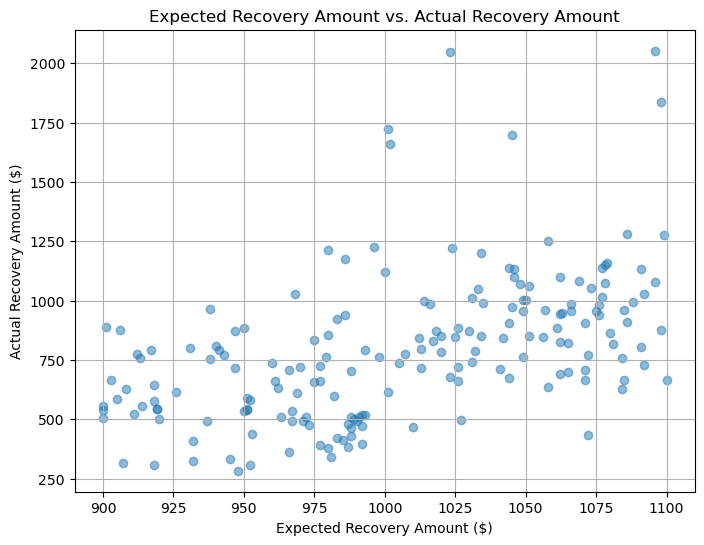

In [84]:
range_min = 900
range_max = 1100
data_range = data[(data['expected_recovery_amount'] >= range_min) & (data['expected_recovery_amount'] <= range_max)]


plt.figure(figsize=(8, 6))
plt.scatter(data_range['expected_recovery_amount'], data_range['actual_recovery_amount'], alpha=0.5)
plt.xlabel('Expected Recovery Amount ($)')
plt.ylabel('Actual Recovery Amount ($)')
plt.title('Expected Recovery Amount vs. Actual Recovery Amount')
plt.grid(True)
plt.show()

WE SEE A DICONTINUITY AROUND THE $1000.

### Statistical analysis: recovery amount

In [97]:
from scipy.stats import kruskal

# Step 1: Filter Data for the Desired Windows
# For the wider window of $900 to $1100
data_window_1 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# For the narrower window of $950 to $1050
data_window_2 = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Step 2: Extract Actual Recovery Amounts for Each Group
actual_recovery_window_1 = data_window_1['actual_recovery_amount']
actual_recovery_window_2 = data_window_2['actual_recovery_amount']
below_threshold_values = below_threshold['actual_recovery_amount']

# Step 3: Apply the Kruskal-Wallis Test
statistic_1, p_value_1 = kruskal(actual_recovery_window_1, below_threshold_values)
statistic_2, p_value_2 = kruskal(actual_recovery_window_2, below_threshold_values)

# Step 4: Interpret the Results
if p_value_1 < 0.05:
    print("For the wider window (900 to 1100): There is statistically significant evidence of differences in actual recovery amount above the $1000 threshold.")
else:
    print("For the wider window (900 to 1100): There is no statistically significant evidence of differences in actual recovery amount above the $1000 threshold.")

if p_value_2 < 0.05:
    print("For the narrower window (950 to 1050): There is statistically significant evidence of differences in actual recovery amount above the $1000 threshold.")
else:
    print("For the narrower window (950 to 1050): There is no statistically significant evidence of differences in actual recovery amount above the $1000 threshold.")


For the wider window (900 to 1100): There is statistically significant evidence of differences in actual recovery amount above the $1000 threshold.
For the narrower window (950 to 1050): There is statistically significant evidence of differences in actual recovery amount above the $1000 threshold.


### Regression modeling: no threshold

In [107]:
from sklearn.linear_model import LinearRegression



#Extract Actual Recovery Amount and Expected Recovery Amount
X = data_window_1['expected_recovery_amount'].values.reshape(-1, 1)
y = data_window_1['actual_recovery_amount']

#Create and Fit the Linear Regression Model
model_without_threshold = LinearRegression()
model_without_threshold.fit(X, y)

#Print the Model Coefficients
print("Model Coefficients:")
print("Intercept (β0):", model_without_threshold.intercept_)
print("Slope (β1):", model_without_threshold.coef_[0])
r_squared = model_without_threshold.score(X, y)
print("R-squared:", r_squared)


Model Coefficients:
Intercept (β0): -1918.454942525362
Slope (β1): 2.6955998470300733
R-squared: 0.2525016112411571


This model confirms that there is a positive linear relationship between the actual recovery amount and the expected recovery amount in the range of $900 to $1100. However, this model does not consider the threshold at $1000, and to investigate the impact of the program at that threshold, we will proceed with building the second model that includes the threshold indicator variable as described earlier.

### Regression modeling: no threshold

From the first model, we see that the regression coefficient is statistically significant for the expected recovery amount and the adjusted R-squared value was about 0.26. As we saw from the graph, on average the actual recovery amount increases as the expected recovery amount increases. We could add polynomial terms of expected recovery amount (such as the squared value of expected recovery amount) to the model but, for the purposes of this practice, let's stick with using just the linear term.

The second model adds an indicator of the true threshold to the model. If there was no impact of the higher recovery strategy on the actual recovery amount, then we would expect that the relationship between the expected recovery amount and the actual recovery amount would be continuous.

In [106]:
import statsmodels.api as sm

# Step 1: Create the Indicator Variable for Threshold
data_range_threshold['above_threshold'] = (data_range_threshold['expected_recovery_amount'] >= 1000).astype(int)

# Step 2: Fit the Linear Regression Model with Indicator Variable
X_with_threshold = data_range_threshold[['expected_recovery_amount', 'above_threshold']]
X_with_threshold = sm.add_constant(X_with_threshold)  # Add constant for intercept
y_with_threshold = data_range_threshold['actual_recovery_amount']

model_with_threshold = sm.OLS(y_with_threshold, X_with_threshold).fit()

# Step 3: Print the Model Summary
print(model_with_threshold.summary())



                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           3.06e-15
Time:                            14:31:54   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\ayoub\AppData\Local\Temp\ipykernel_18364\3139410909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_range_threshold['above_threshold'] = (data_range_threshold['expected_recovery_amount'] >= 1000).astype(int)


### Regression modeling: adjusting the window

In [108]:
import statsmodels.api as sm

# Step 1: Create the Indicator Variable for Threshold
data_window_2['above_threshold'] = (data_window_2['expected_recovery_amount'] >= 1000).astype(int)

# Step 2: Fit the Linear Regression Model with Indicator Variable
X_with_threshold_window_2 = data_window_2[['expected_recovery_amount', 'above_threshold']]
X_with_threshold_window_2 = sm.add_constant(X_with_threshold_window_2)  # Add constant for intercept
y_with_threshold_window_2 = data_window_2['actual_recovery_amount']

model_with_threshold_window_2 = sm.OLS(y_with_threshold_window_2, X_with_threshold_window_2).fit()

# Step 3: Print the Model Summary
print(model_with_threshold_window_2.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.287
Model:                                OLS   Adj. R-squared:                  0.273
Method:                     Least Squares   F-statistic:                     19.55
Date:                    Wed, 19 Jul 2023   Prob (F-statistic):           7.33e-08
Time:                            14:47:37   Log-Likelihood:                -699.42
No. Observations:                     100   AIC:                             1405.
Df Residuals:                          97   BIC:                             1413.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\ayoub\AppData\Local\Temp\ipykernel_18364\1416073348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_window_2['above_threshold'] = (data_window_2['expected_recovery_amount'] >= 1000).astype(int)
